<H1 style="text-align: center">ECMM422 - Machine Learning Test (Choose the best classifiers)</H1>
<H2 style="text-align: center">Ensemble Methods</H2>

<div class="alert alert-info">
 These are the prerequisites for testing different Machine learning algorithmns to chose the best three for further testing. 
 </div>

In [1]:
!pip install -q import_ipynb

In [2]:
# for matrices and numerical methods
import numpy as np
import import_ipynb

# for plotting functions
import matplotlib.pyplot as plt

# for loading the data we will use
from ECMM428_Individual_Research_Project import graph_reader,get_data_labels,virtual_user5,visualize_network

# for KFold cross-validation
from sklearn.model_selection import KFold,train_test_split

# for calculating accuracy, check help(accuracy_score) for details
from sklearn.metrics import accuracy_score

# for having progress bars for longer processes, use help(tqdm) for syntax
from tqdm import tqdm

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier


import warnings
warnings.filterwarnings("ignore")


importing Jupyter notebook from ECMM428_Individual_Research_Project.ipynb


### Data: The visual genome dataset

For this project you should use the <i>image</i> data available in <tt>ECMM428_Individual_Research_Project</tt> as an example (see below).

In [3]:
# loading the digit data
from scipy.sparse import csr_matrix
perl = "elephant"
graphs = graph_reader(perl)
(X,Y) = get_data_labels(graphs,virtual_user5)
tm = []
print(X)
for temp in X:
    values =temp.data
    rows = temp.tocoo().row
    tm.append(values)
    columns = temp.tocoo().col
#     resolve = csr_matrix((values, (rows, columns)), shape=(len(new_Xall)//4, len(new_Xall)//4)).toarray()
#     X.append(resolve)
print(np.array(tm))

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y, test_size=0.25)

2147it [00:01, 1539.84it/s]
100%|██████████| 2145/2145 [00:00<00:00, 53742.93it/s]


  (0, 1248)	0.06722926454528148
  (0, 1506)	0.03361463227264074
  (0, 2191)	0.01680731613632037
  (0, 3788)	0.08403658068160186
  (0, 3854)	0.03361463227264074
  (0, 3888)	0.01680731613632037
  (0, 3926)	0.01680731613632037
  (0, 4778)	0.08403658068160186
  (0, 5050)	0.06722926454528148
  (0, 5136)	0.03361463227264074
  (0, 5474)	0.20168779363584446
  (0, 6074)	0.16807316136320372
  (0, 6329)	0.050421948408961116
  (0, 6586)	0.050421948408961116
  (0, 6859)	0.01680731613632037
  (0, 7265)	0.08403658068160186
  (0, 7266)	0.5042194840896111
  (0, 7412)	0.03361463227264074
  (0, 7953)	0.16807316136320372
  (0, 9826)	0.13445852909056297
  (0, 10421)	0.01680731613632037
  (0, 10532)	0.01680731613632037
  (0, 10704)	0.06722926454528148
  (0, 11162)	0.30253169045376666
  (0, 11716)	0.03361463227264074
  :	:
  (2144, 32826)	0.10063092108532548
  (2144, 33270)	0.02515773027133137
  (2144, 33642)	0.05031546054266274
  (2144, 39098)	0.05031546054266274
  (2144, 39650)	0.05031546054266274
  (2144,

# **Show images in filtered dataset**

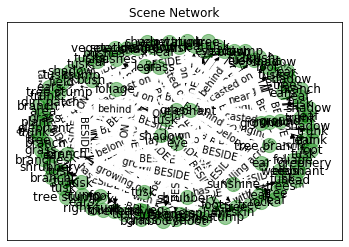

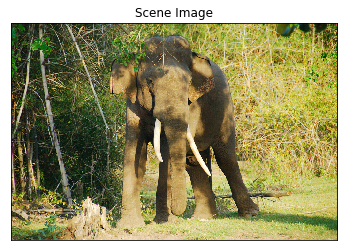

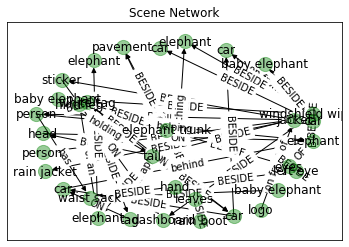

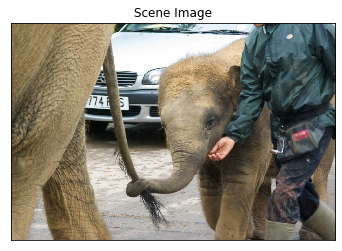

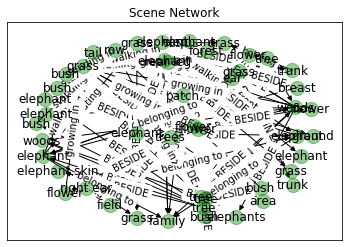

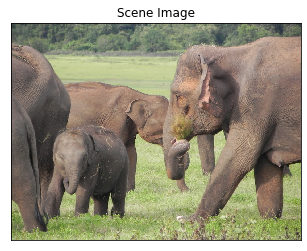

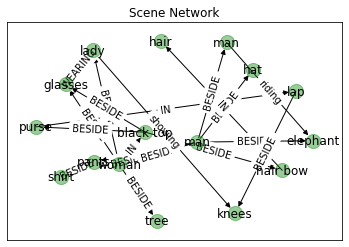

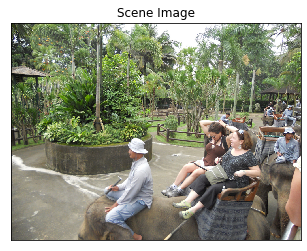

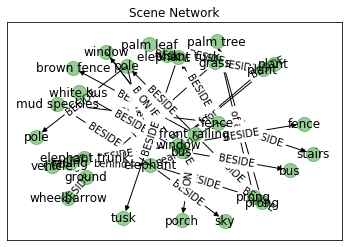

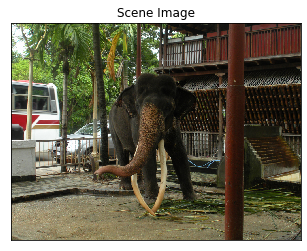

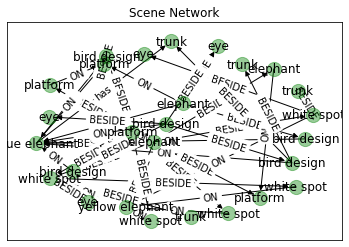

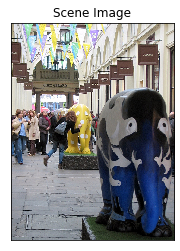

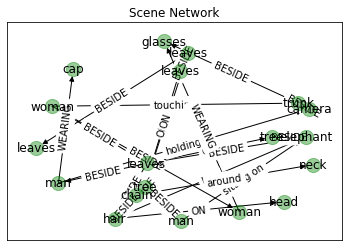

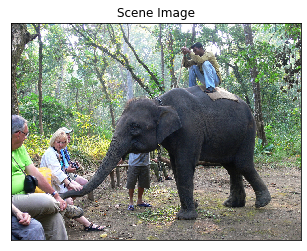

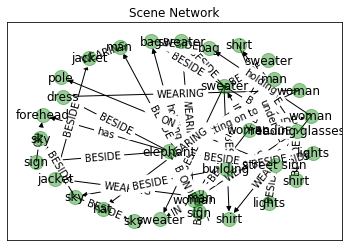

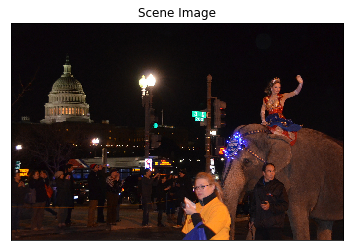

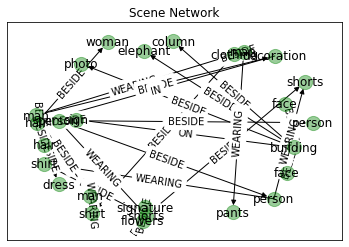

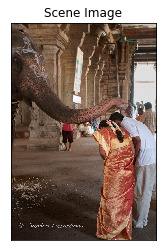

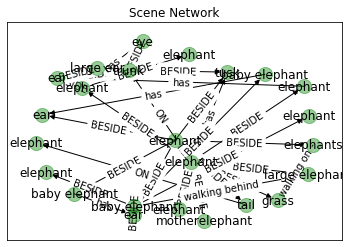

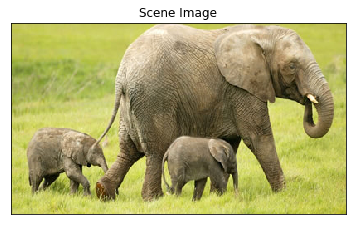

In [4]:
for ip in range(0,10 ):
    img = visualize_network(graphs[ip],image = True)

# Testing diffrenent classifiers

In [5]:
# Author: Peter Prettenhofer <peter.prettenhofer@gmail.com>
#         Olivier Grisel <olivier.grisel@ensta.org>
#         Mathieu Blondel <mathieu@mblondel.org>
#         Lars Buitinck
# License: BSD 3 clause
import logging
import numpy as np
from optparse import OptionParser
import sys
from time import time
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import RidgeClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import BernoulliNB, ComplementNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.extmath import density
from sklearn import metrics


# Display progress logs on stdout
logging.basicConfig(level=logging.INFO,
                    format='%(asctime)s %(levelname)s %(message)s')

op = OptionParser()
op.add_option("--report",
              action="store_true", dest="print_report",
              help="Print a detailed classification report.")
op.add_option("--chi2_select",
              action="store", type="int", dest="select_chi2",
              help="Select some number of features using a chi-squared test")
op.add_option("--confusion_matrix",
              action="store_true", dest="print_cm",
              help="Print the confusion matrix.")
op.add_option("--top10",
              action="store_true", dest="print_top10",
              help="Print ten most discriminative terms per class"
                   " for every classifier.")
op.add_option("--all_categories",
              action="store_true", dest="all_categories",
              help="Whether to use all categories or not.")
op.add_option("--use_hashing",
              action="store_true",
              help="Use a hashing vectorizer.")
op.add_option("--n_features",
              action="store", type=int, default=2 ** 16,
              help="n_features when using the hashing vectorizer.")
op.add_option("--filtered",
              action="store_true",
              help="Remove newsgroup information that is easily overfit: "
                   "headers, signatures, and quoting.")


def is_interactive():
    return not hasattr(sys.modules['__main__'], '__file__')


# work-around for Jupyter notebook and IPython console
argv = [] if is_interactive() else sys.argv[1:]
(opts, args) = op.parse_args(argv)
if len(args) > 0:
    op.error("this script takes no arguments.")
    sys.exit(1)

print(__doc__)
op.print_help()
print()

Automatically created module for IPython interactive environment
Usage: ipykernel_launcher.py [options]

Options:
  -h, --help            show this help message and exit
  --report              Print a detailed classification report.
  --chi2_select=SELECT_CHI2
                        Select some number of features using a chi-squared
                        test
  --confusion_matrix    Print the confusion matrix.
  --top10               Print ten most discriminative terms per class for
                        every classifier.
  --all_categories      Whether to use all categories or not.
  --use_hashing         Use a hashing vectorizer.
  --n_features=N_FEATURES
                        n_features when using the hashing vectorizer.
  --filtered            Remove newsgroup information that is easily overfit:
                        headers, signatures, and quoting.



# Benchmark

We train and test the datasets with 17 different classification models and get performance results for each model.

In [6]:
def benchmark(clf):
    print('_' * 80)
    print("Training: ")
    print(clf)
    t0 = time()
    clf.fit(Xtrain, Ytrain)
    train_time = time() - t0
    print("train time: %0.3fs" % train_time)

    t0 = time()
    pred = clf.predict(Xtest)
    test_time = time() - t0
    print("test time:  %0.3fs" % test_time)

    score = metrics.accuracy_score(Ytest, pred)
    print("accuracy:   %0.3f" % score)

    if hasattr(clf, 'coef_'):
        print("dimensionality: %d" % clf.coef_.shape[1])
        print("density: %f" % density(clf.coef_))

        if opts.print_top10 and feature_names is not None:
            print("top 10 keywords per class:")
            for i, label in enumerate(target_names):
                top10 = np.argsort(clf.coef_[i])[-10:]
                print(trim("%s: %s" % (label, " ".join(feature_names[top10]))))
        print()

    if opts.print_report:
        print("classification report:")
        print(metrics.classification_report(Ytest, pred,
                                            target_names=target_names))

    if opts.print_cm:
        print("confusion matrix:")
        print(metrics.confusion_matrix(Ytest, pred))

    print()
    clf_descr = str(clf).split('(')[0]
    return clf_descr, score, train_time, test_time


results = []
for clf, name in (
        (RidgeClassifier(tol=1e-2, solver="sag"), "Ridge Classifier"),
        (AdaBoostClassifier(DecisionTreeClassifier(max_depth = 2,min_samples_split = 3,min_samples_leaf=1,random_state=1),learning_rate = 1,random_state=1),"Boosting Classifier"),
        (Perceptron(max_iter=50), "Perceptron"),
        (DecisionTreeClassifier(max_depth = 2,min_samples_split = 3,min_samples_leaf=1,random_state=1), "Decision Tree"),
        (PassiveAggressiveClassifier(max_iter=50),
         "Passive-Aggressive"),
        (KNeighborsClassifier(n_neighbors=10), "kNN"),
        (RandomForestClassifier(), "Random forest")):
    print('=' * 80)
    print(name)
    results.append(benchmark(clf))

for penalty in ["l2", "l1"]:
    print('=' * 80)
    print("%s penalty" % penalty.upper())
    # Train Liblinear model
    results.append(benchmark(LinearSVC(penalty=penalty, dual=False,
                                       tol=1e-3)))

    # Train SGD model
    results.append(benchmark(SGDClassifier(alpha=.0001, max_iter=50,
                                           penalty=penalty)))

# Train SGD with Elastic Net penalty
print('=' * 80)
print("Elastic-Net penalty")
results.append(benchmark(SGDClassifier(alpha=.0001, max_iter=50,
                                       penalty="elasticnet")))

# Train NearestCentroid without threshold
print('=' * 80)
print("NearestCentroid (aka Rocchio classifier)")
results.append(benchmark(NearestCentroid()))

# Train sparse Naive Bayes classifiers
print('=' * 80)
print("Naive Bayes")
results.append(benchmark(MultinomialNB(alpha=.01)))
results.append(benchmark(BernoulliNB(alpha=.01)))
results.append(benchmark(ComplementNB(alpha=.1)))

print('=' * 80)
print("LinearSVC with L1-based feature selection")
# The smaller C, the stronger the regularization.
# The more regularization, the more sparsity.
results.append(benchmark(Pipeline([
  ('feature_selection', SelectFromModel(LinearSVC(penalty="l1", dual=False,
                                                  tol=1e-3))),
  ('classification', LinearSVC(penalty="l2"))])))

Ridge Classifier
________________________________________________________________________________
Training: 
RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=None, solver='sag',
                tol=0.01)
train time: 0.149s
test time:  0.025s
accuracy:   0.939
dimensionality: 65537
density: 0.100584


Boosting Classifier
________________________________________________________________________________
Training: 
AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=2,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0

accuracy:   0.864

Naive Bayes
________________________________________________________________________________
Training: 
MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)
train time: 0.057s
test time:  0.001s
accuracy:   0.922
dimensionality: 65537
density: 1.000000


________________________________________________________________________________
Training: 
BernoulliNB(alpha=0.01, binarize=0.0, class_prior=None, fit_prior=True)
train time: 0.007s
test time:  0.029s
accuracy:   0.935
dimensionality: 65537
density: 1.000000


________________________________________________________________________________
Training: 
ComplementNB(alpha=0.1, class_prior=None, fit_prior=True, norm=False)
train time: 0.011s
test time:  0.002s
accuracy:   0.922
dimensionality: 65537
density: 1.000000


LinearSVC with L1-based feature selection
________________________________________________________________________________
Training: 
Pipeline(memory=None,
         steps=[('feature_selection',
   

# Add Plots

The bar plot indicates the accuracy, training time (normalized) and test time (normalized) of each classifier.

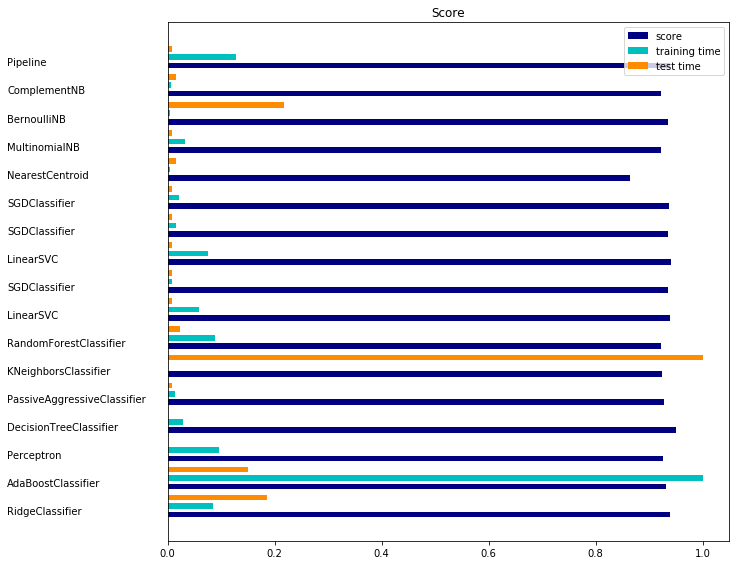

In [7]:
indices = np.arange(len(results))

results = [[x[i] for x in results] for i in range(4)]

clf_names, score, training_time, test_time = results
training_time = np.array(training_time) / np.max(training_time)
test_time = np.array(test_time) / np.max(test_time)

plt.figure(figsize=(12, 8))
plt.title("Score")
plt.barh(indices, score, .2, label="score", color='navy')
plt.barh(indices + .3, training_time, .2, label="training time",
         color='c')
plt.barh(indices + .6, test_time, .2, label="test time", color='darkorange')
plt.yticks(())
plt.legend(loc='best')
plt.subplots_adjust(left=.25)
plt.subplots_adjust(top=.95)
plt.subplots_adjust(bottom=.05)

for i, c in zip(indices, clf_names):
    plt.text(-.3, i, c)

plt.show()